In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import the dataset
df = pd.read_csv('Cleaned_dataset.csv')

In [35]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
#drop extra variables
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [37]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
#finding data anamoly
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [ ]:
#dealing with the anamoly
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [40]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [41]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [42]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [43]:
#making dependent and independent datasets
X = df.drop('FWI', axis=1)
y = df['FWI']

In [ ]:
#making the test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
X_train.shape

(182, 11)

In [46]:
X_test.shape

(61, 11)

<Axes: >

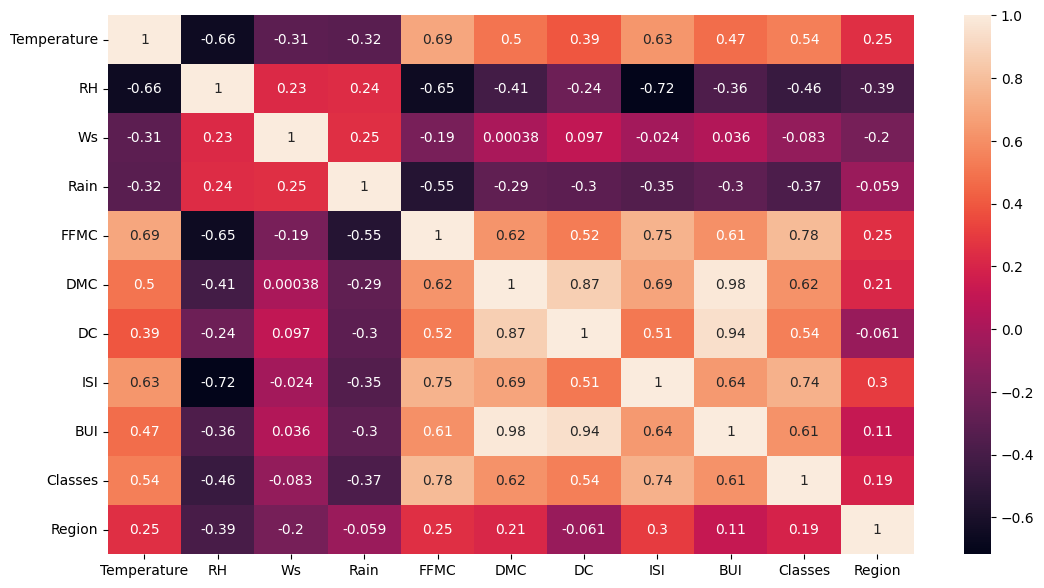

In [47]:
#lets do feature selection
import seaborn as sns
plt.figure(figsize=(13,7))
sns.heatmap(X_train.corr(), annot=True)

In [ ]:
#getting the highly correlated columns
def corelation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
col_corr = corelation(X_train, 0.8)

In [ ]:
#deleting the correlated features for train set
X_train.drop(col_corr, inplace=True, axis = 1)

In [51]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [ ]:
#deleting the correlated features for test set
X_test.drop(col_corr, inplace=True, axis = 1)

In [53]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


Standardization

In [ ]:
#applying standard scaler on our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

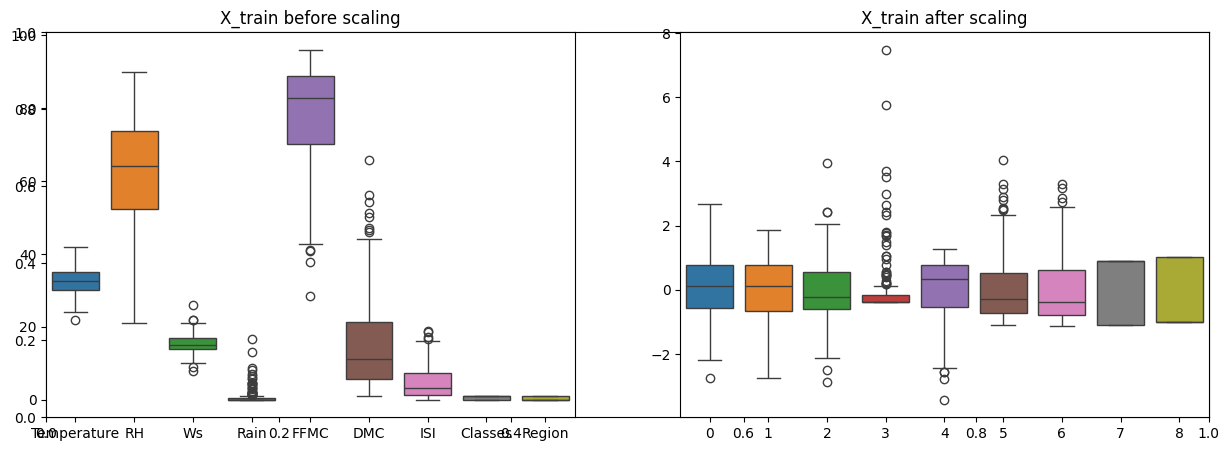

In [ ]:
#lets see how the scaling affects our dataset
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

Model training

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mae: {mae}")
print(f"r2 score: {r2}")

Mae: 0.5468236465249978
r2 score: 0.9847657384266951


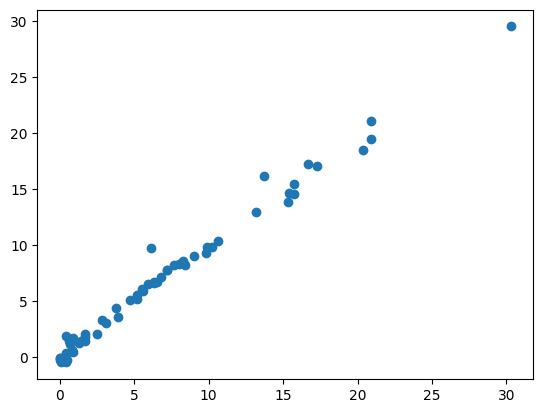

In [57]:
plt.scatter(y_test, y_pred)

Let's try out regularization too

In [ ]:
#applying lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mae: {mae}")
print(f"r2 score: {r2}")

Mae: 1.133175994914409
r2 score: 0.9492020263112388


In [ ]:
#trying our for ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mae: {mae}")
print(f"r2 score: {r2}")

Mae: 0.5642305340105715
r2 score: 0.9842993364555512


In [60]:
#trying out elastic net
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mae: {mae}")
print(f"r2 score: {r2}")

Mae: 1.8822353634896005
r2 score: 0.8753460589519703


Hyperparameter tuning using lassocv

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



Mae: 0.619970115826343
r2 score: 0.9820946715928275


Mae: 0.619970115826343
r2 score: 0.9820946715928275


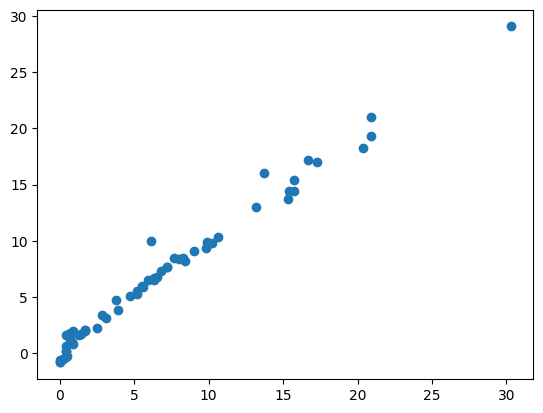

In [ ]:
print(f"Mae: {mae}")
print(f"r2 score: {r2}")
plt.scatter(y_test, y_pred)

Hyperparameter tuning RidgeCV

In [66]:
#trying our for ridgecv regression
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Mae: 0.5642305340105715
r2 score: 0.9842993364555512


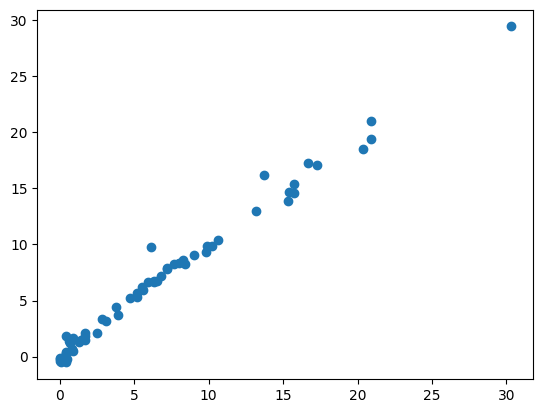

In [67]:
print(f"Mae: {mae}")
print(f"r2 score: {r2}")
plt.scatter(y_test, y_pred)

Same with ElasticCV

In [68]:
#trying out elasticcv net
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(cv=5)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mae: 0.6575946731430898
r2 score: 0.9814217587854941


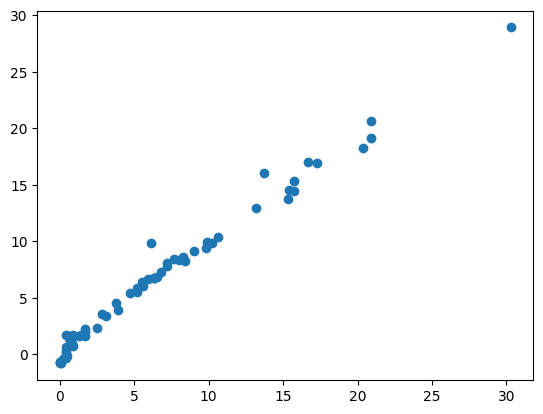

In [69]:
print(f"Mae: {mae}")
print(f"r2 score: {r2}")
plt.scatter(y_test, y_pred)